In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['clubs_in_leagues.csv', 'stats_of_players.csv', 'dict_clubs.csv', 'pos_stats_of_players.csv', 'dict_countries.csv', 'dict_leagues.csv', 'transfers.csv', 'nat_stats_of_players.csv', 'dict_players.csv', 'coaches_in_clubs.csv', 'dict_stadiums.csv', 'players_in_clubs.csv']


In [2]:
players = pd.read_csv('../input/dict_players.csv', sep=";")
# 몇행 몇열인지 확인
players.shape

(11382, 24)

In [3]:
#상위 5개
players.head()

,id,name,original_name,club_id,club_name,position_main,other_positions,nationality_name,nationality_code,other_nationality_name,other_nationality_code,date_of_birth,place_of_birth_name,place_of_birth_country_name,place_of_birth_country_code,foot,height,player_agent,joined,contract_until,outfiter,last_extention,contract_options,current_market_value
0,1,Jermaine Beckford,Jermaine Paul Alexander Beckford,289,Bolton,Centre-Forward,Right Winger,Jamaica,JAM,England,GBR,1983-12-09,London,England,GBR,right,188.0,NaN,2017-07-01,2019-06-30,NaN,NaN,NaN,500000.0
1,2,Harry Charsley,Henry William James Charsley,289,Bolton,Central Midfield,"Right Midfield, Left Midfield",Ireland,IRL,England,GBR,1996-11-01,Wirral,England,GBR,right,NaN,NaN,2014-07-01,2019-06-30,NaN,2016-07-15,NaN,250000.0
2,3,Mark Davies,Mark Nicholas Davies,289,Bolton,Central Midfield,"Attacking Midfield, Right Midfield",England,GBR,NaN,NaN,1988-02-18,Willenhall,England,GBR,right,180.0,NaN,2017-07-01,NaN,NaN,NaN,NaN,750000.0
3,4,Alex McQuade,Alexander Michael McQuade,289,Bolton,Centre-Back,Left-Back,England,GBR,NaN,NaN,1992-11-07,Manchester,England,GBR,left,NaN,NaN,2018-07-01,NaN,NaN,NaN,NaN,50000.0
4,5,Przemyslaw Kazimierczak,Przemysław Kazimierczak,289,Bolton,Goalkeeper,NaN,Poland,POL,NaN,NaN,1988-05-05,Łódź,Poland,POL,right,191.0,SOLSPORT,2018-08-08,NaN,NaN,NaN,NaN,50000.0


In [4]:
players.columns

Index(['id', 'name', 'original_name', 'club_id', 'club_name', 'position_main',
       'other_positions', 'nationality_name', 'nationality_code',
       'other_nationality_name', 'other_nationality_code', 'date_of_birth',
       'place_of_birth_name', 'place_of_birth_country_name',
       'place_of_birth_country_code', 'foot', 'height', 'player_agent',
       'joined', 'contract_until', 'outfiter', 'last_extention',
       'contract_options', 'current_market_value'],
      dtype='object')

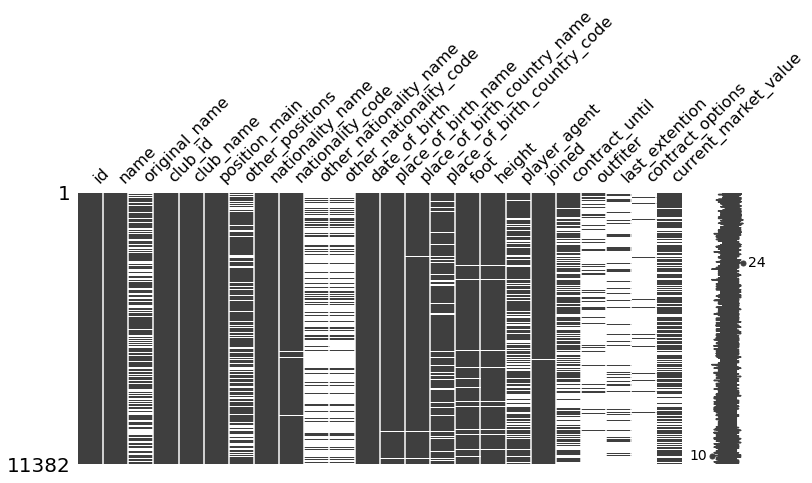

In [5]:
# missingno - NaN 데이터 시각
import missingno as msno
msno.matrix(players, figsize=(12,5))

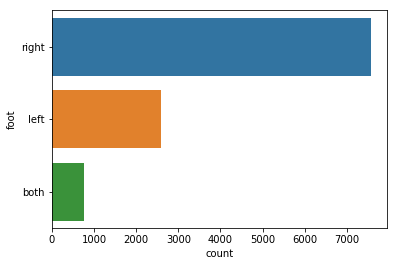

In [6]:
sns.countplot(y='foot', data = players)

In [7]:
# 선수 국가별
con_df = pd.DataFrame(players['nationality_name'].value_counts())
# 'nationality_name' 컬럼을 인덱스로 지정
con_df['국적'] = con_df.index
con_df.columns = ['선수 수', '국적']
con_df = con_df.reset_index().drop('index', axis =1)
con_df.head(20)

,선수 수,국적
0,978,Spain
1,834,France
2,755,Brazil
3,741,Italy
4,678,England
5,636,Germany
6,551,Turkey
7,420,Portugal
8,408,Netherlands
9,392,Argentina


In [8]:
# 선수 키에 대한 정보
players['height'].describe()

count    11046.000000
mean       181.866377
std          6.757192
min         17.000000
25%        178.000000
50%        182.000000
75%        186.000000
max        270.000000
Name: height, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


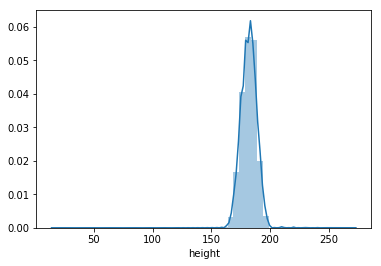

In [9]:
sns.distplot(players[players['height']> 0]['height'])

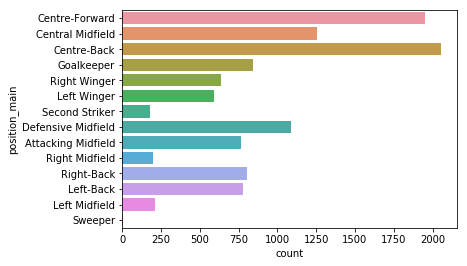

In [10]:
sns.countplot(y='position_main', data=players)

In [11]:
# 국적의 비율
players_nat_count= pd.DataFrame(players['nationality_name'].value_counts())
players_nat_percent= pd.DataFrame(players['nationality_name'].value_counts(normalize=True))
players_nat_df= players_nat_count.merge(players_nat_percent,left_index=True,right_index=True)
players_nat_df.columns = ['국적', '비율']
players_nat_df

,국적,비율
Spain,978,0.085925
France,834,0.073274
Brazil,755,0.066333
Italy,741,0.065103
England,678,0.059568
Germany,636,0.055878
Turkey,551,0.048410
Portugal,420,0.036900
Netherlands,408,0.035846
Argentina,392,0.034440


In [12]:
kr = players.loc[(players['nationality_name']=='Korea, South')]
print('The number of players from Korea: '+ str(kr.shape[0]))

The number of players from Korea: 30


In [13]:
pd.DataFrame(kr['position_main'].value_counts())

,position_main
Centre-Forward,7
Attacking Midfield,6
Left-Back,5
Defensive Midfield,5
Right Winger,2
Left Winger,2
Right-Back,1
Centre-Back,1
Second Striker,1


Text(0.5,1,'Korea')

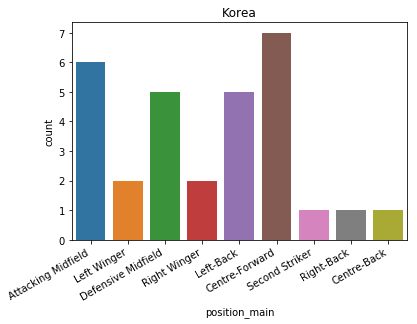

In [14]:
sns.countplot(x='position_main', data=kr)
plt.xticks(rotation=30, ha='right')
plt.title('Korea')

In [15]:
pd.DataFrame(kr['club_name'].value_counts())

,club_name
FC Augsburg,2
Wigan,2
Zenit S-Pb,2
1.FSV Mainz 05,2
Monaco,1
Bolton,1
Spurs,1
Bor. Dortmund,1
AFC Tubize,1
Trabzonspor,1


In [16]:
kr['current_market_value'].describe()

count    2.100000e+01
mean     4.180952e+06
std      1.069510e+07
min      1.250000e+05
25%      5.500000e+05
50%      1.000000e+06
75%      3.500000e+06
max      5.000000e+07
Name: current_market_value, dtype: float64